In [1]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.00

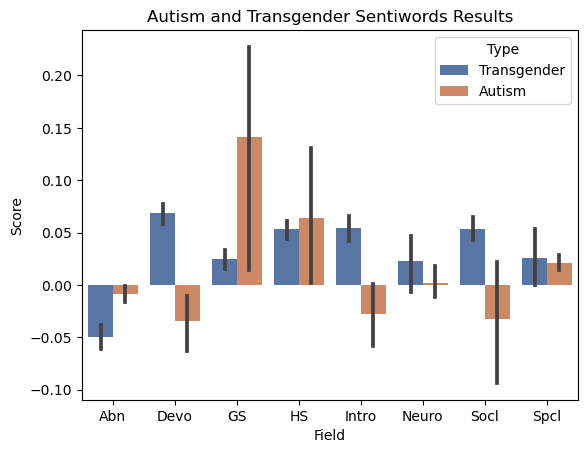

In [2]:
# SentiWords

# Getting the autism data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_transgender.csv", low_memory=False)
df_transgender_sentiwords = df_transgender_sentiwords.sort_values("Textbook")

print(df_transgender_sentiwords)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_transgender_sentiwords_fields = pd.read_csv("field_df_sentiwords_transgender.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_sentiwords_fields["Score"], df_transgender_sentiwords_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_sentiwords_fields["Type"] = "Transgender"
df_autism_sentiwords_fields["Type"] = "Autism"

alphabetical_transgender_sentiwords = df_transgender_sentiwords_fields["Textbook"].str.split("_").values 
beginning_transgender_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_sentiwords.append(new_text_name)

df_transgender_sentiwords_fields["Common_Textbook"] = beginning_transgender_sentiwords

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

# print(df_autism_sentiwords_fields)

combined_df_sentiwords = df_transgender_sentiwords_fields.merge(df_autism_sentiwords_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_sentiwords)

ax.set_title("Autism and Transgender Sentiwords Results")

plt.savefig('fields_comparison_sentiwords.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx  0.282339
1    Abn_Barlow_05_Transgender_v2.docx -0.049555
2    Abn_Barlow_06_Transgender_v2.docx -0.045714
3    Abn_Barlow_07_Transgender_v2.docx -0.783257
4       Abn_Barlow_08_Transgender.docx -0.575150
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.699332
234  Spcl_Turnbull_06_Transgender.docx  0.29

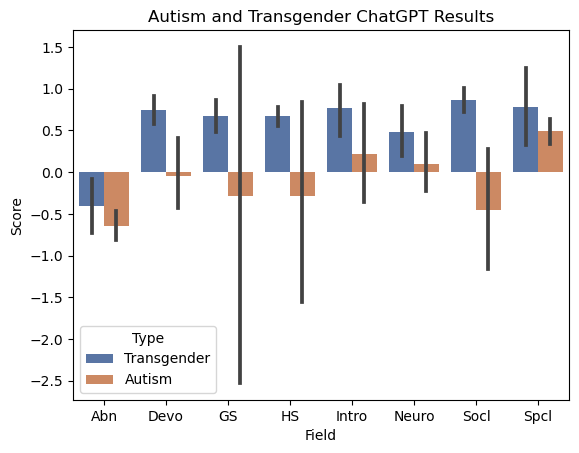

In [3]:
# ChatGPT

# Getting the autism data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_chatgpt = pd.read_csv("chatgpt_sentiments_transgender_03_13_2024_official.csv", low_memory=False)
df_transgender_chatgpt = df_transgender_chatgpt.sort_values("Textbook")

print(df_transgender_chatgpt)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_transgender_chatgpt_fields = pd.read_csv("field_df_transgender_chatgpt.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_chatgpt_fields["Score"], df_transgender_chatgpt_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_chatgpt_fields["Type"] = "Transgender"
df_autism_chatgpt_fields["Type"] = "Autism"

alphabetical_transgender_chatgpt = df_transgender_chatgpt_fields["Textbook"].str.split("_").values 
beginning_transgender_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_chatgpt.append(new_text_name)

df_transgender_chatgpt_fields["Common_Textbook"] = beginning_transgender_chatgpt

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatgpt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

# print(df_autism_sentiwords_fields)

combined_df_chatgpt = df_transgender_chatgpt_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_chatgpt)

ax.set_title("Autism and Transgender ChatGPT Results")

plt.savefig('fields_comparison_sentiwords.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.d

group1,group2,meandiff,p-adj,lower,upper,reject
ChatGPT,Dictionary,0.2543,0.0004,0.099,0.4097,True
ChatGPT,SentiWords,0.0267,0.9139,-0.1286,0.1821,False
Dictionary,SentiWords,-0.2276,0.0018,-0.3829,-0.0723,True


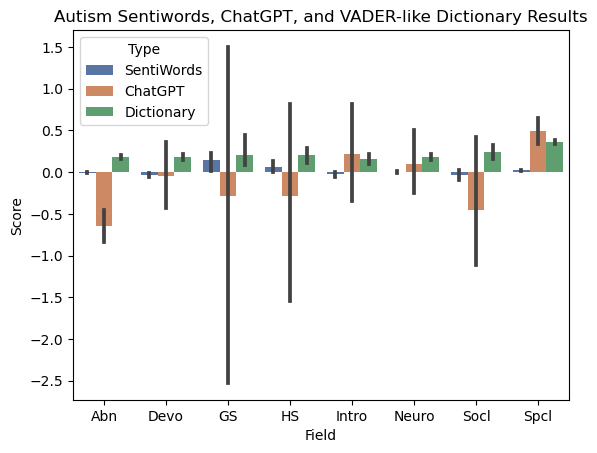

In [8]:
# Autism Only (Including VADER-like Dictionary)

# SentiWords

# Getting the sentiwords data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the chatgpt data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the VADER-like data frame

df_autism = pd.read_csv("sentiments_3_19_2024_autism.csv", low_memory=False)
df_autism = df_autism.sort_values("Textbook")

print(df_autism)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_autism = pd.read_csv("field_df_autism.csv", low_memory=False)

# Graph fields together

# Make new dataframe

# Combine textbooks

df_autism_chatgpt_fields["Type"] = "ChatGPT"
df_autism_sentiwords_fields["Type"] = "SentiWords"
df_autism["Type"] = "Dictionary"

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatpgt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatpgt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

alphabetical_autism = df_autism["Textbook"].str.split("_").values 
beginning_autism = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism.append(new_text_name)

df_autism["Common_Textbook"] = beginning_autism

# print(df_autism_sentiwords_fields)

combined_df_autism_intermediate = df_autism_sentiwords_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])
combined_df_autism = combined_df_autism_intermediate.merge(df_autism, how="outer", on=['Common_Textbook', 'Field', "Type", "Score"])

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

anova = f_oneway(combined_df_autism[combined_df_autism['Type'] == 'ChatGPT']["Score"], combined_df_autism[combined_df_autism['Type'] == 'SentiWords']['Score'],
        combined_df_autism[combined_df_autism['Type'] == 'Dictionary']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(combined_df_autism['Score'], combined_df_autism['Type'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_autism)

ax.set_title("Autism Sentiwords, ChatGPT, and VADER-like Dictionary Results")

plt.savefig('fields_comparison_autism.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

In [6]:
# Transgender Only